# test evaluation

In [1]:
import tensorflow as tf
print(tf.__version__)

2024-12-28 02:50:02.389329: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.1


In [2]:
MLFLOW_URI = uri="http://pistachio_mlflow:5000"
MLFLOW_EXPERIMENT = "pistachio_tf_tuning_fc2"
MLFLOW_RUN_DESCRIPTION = 'initial tuning of dense model with feature crosses wide linkage at final layer'
MLFLOW_TAGS = {'architecture': f'feature crosses with wide linkage'}
import mlflow

mlflow.set_tracking_uri(MLFLOW_URI)

In [3]:
# from pistachio.data import read_or_generate_splits
# # define where train/test csvs will live
# split_data_path = f"./data/seed_{SEED}/"
# if not os.path.exists(split_data_path):
#     os.makedirs(split_data_path)

# train_df, valid_df, test_df = read_or_generate_splits(split_data_path, csv_filename, seed=SEED)

In [4]:
# get the best run
client = mlflow.tracking.MlflowClient()#tracking_uri=MLFLOW_URI)
experiment_info = client.get_experiment_by_name(MLFLOW_EXPERIMENT)

best_run = client.search_runs(
    experiment_info.experiment_id, order_by=["metrics.best_epoch_val_loss ASC"], max_results=1
)[0]
print(best_run.info.run_name)

unique-croc-128


In [5]:
# filter runs
# pick out a specific run by name
run_name = "unequaled-stoat-25"
# https://mlflow.org/docs/latest/python_api/mlflow.client.html#mlflow.client.MlflowClient.search_registered_models
selected_run = client.search_runs(experiment_info.experiment_id, filter_string=f'run.run_name="{run_name}"')[0]
print(selected_run.info)

<RunInfo: artifact_uri='/mlflow/artifacts/2/6ec34fd4f0dc4a2fb489ff2db6e31cdd/artifacts', end_time=1734125507772, experiment_id='2', lifecycle_stage='active', run_id='6ec34fd4f0dc4a2fb489ff2db6e31cdd', run_name='unequaled-stoat-25', run_uuid='6ec34fd4f0dc4a2fb489ff2db6e31cdd', start_time=1734125461540, status='FINISHED', user_id='root'>


In [6]:
#load the model
run_id = selected_run.info.run_id
model_uri = f'runs:/{run_id}/keras_model'

model = mlflow.keras.load_model(model_uri)

2024-12-28 02:50:04.671731: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-28 02:50:04.678677: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-28 02:50:04.678873: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [7]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ MAJOR_AXIS          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MINOR_AXIS          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ECCENTRICITY        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ AREA (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ PERIMETER           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalizer_MAJOR_A… │ (None, 1)         │          3 │ MAJOR_AXIS[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalizer_MINOR_A… │ (None, 1)         │          3 │ MINOR_AXIS[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalizer_ECCENTR… │ (None, 1)         │          3 │ ECCENTRICITY[0][… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ EQDIASQ             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SOLIDITY            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CONVEX_AREA         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ EXTENT (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ASPECT_RATIO        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROUNDNESS           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ COMPACTNESS         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SHAPEFACTOR_1       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SHAPEFACTOR_2       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 665 (2.66 KB)

 Trainable params: 205 (820.00 B)

 Non-trainable params: 48 (256.00 B)

 Optimizer params: 412 (1.61 KB)

In [8]:
import json
run_data = selected_run.data.to_dictionary()
feature_columns_raw = run_data['params']['feature_columns']
print(feature_columns_raw)
feature_columns = json.loads(feature_columns_raw.replace('(','[').replace(')',']').replace("'",'"'))
feature_columns

('AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY', 'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO', 'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'SHAPEFACTOR_4')


['AREA',
 'PERIMETER',
 'MAJOR_AXIS',
 'MINOR_AXIS',
 'ECCENTRICITY',
 'EQDIASQ',
 'SOLIDITY',
 'CONVEX_AREA',
 'EXTENT',
 'ASPECT_RATIO',
 'ROUNDNESS',
 'COMPACTNESS',
 'SHAPEFACTOR_1',
 'SHAPEFACTOR_2',
 'SHAPEFACTOR_3',
 'SHAPEFACTOR_4']

In [9]:
# get the test dataset
from pistachio.data import read_or_generate_splits
import os
SEED=37
split_data_path = f"./data/seed_{SEED}/"
csv_filename = './data/pistachio_16.csv'

train_df, valid_df, test_df = read_or_generate_splits(split_data_path, csv_filename, seed=SEED)

test_features = {k: test_df[k].values for k in feature_columns}
test_labels = test_df['Class'].values
test_predictions = model.predict(test_features)
test_df['predicted_prob'] = test_predictions
threshold = 0.5
test_df['predicted_class'] = test_df.predicted_prob.map(lambda x: 0 if x < threshold else 1)



I0000 00:00:1735354205.836167    2609 service.cc:145] XLA service 0x777e9c00c330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735354205.836195    2609 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-12-28 02:50:05.849596: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-28 02:50:05.932758: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


 1/14 ━━━━━━━━━━━━━━━━━━━━ 7s 545ms/step

I0000 00:00:1735354206.200042    2609 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


## Test Metrics

In [10]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, roc_curve

from pistachio.evaluation import plot_metric, get_roc_results, plot_roc_curve, get_confusion_matrix
from pistachio.evaluation import make_precision_recall_plot, make_prob_calibration_plot, make_confusion_matrix_plot
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
plot_dir = f'./plots/{run_name}/'

test_auc_score = roc_auc_score(test_df.Class, test_df.predicted_prob)
with open('./test_metrics.txt','w') as outfile:
    outfile.write(f'accuracy: {accuracy_score(test_df.Class,test_df.predicted_class)}\n')
    outfile.write(f'precision: {precision_score(test_df.Class,test_df.predicted_class)}\n')
    outfile.write(f'recall: {recall_score(test_df.Class,test_df.predicted_class)}\n')
    outfile.write(f'f1_score: {f1_score(test_df.Class,test_df.predicted_class)}\n')
    outfile.write(f'roc_auc_score: {test_auc_score}\n')

print(open('./test_metrics.txt','r').read())



accuracy: 0.872093023255814
precision: 0.8137254901960784
recall: 0.907103825136612
f1_score: 0.8578811369509044
roc_auc_score: 0.9430101103957876



/tf/notebooks/pistachio/evaluation.py:49: RuntimeWarning: overflow encountered in cast
  thresholds[0] = sys.float_info.max


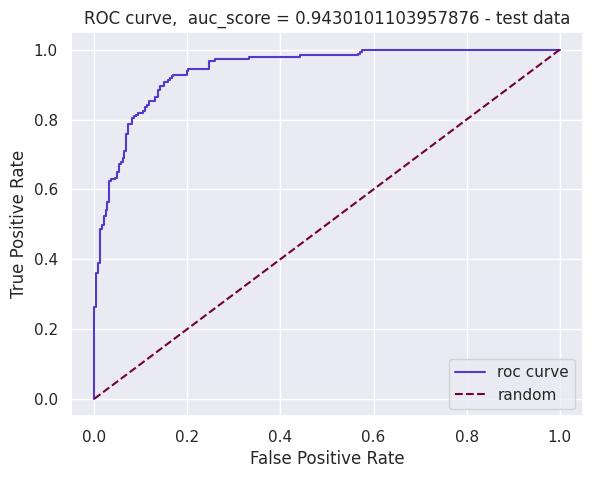

In [11]:
# ROC curve
roc_results = get_roc_results(test_df.predicted_prob, test_df.Class)
fig, ax = plot_roc_curve(*roc_results, title=f'ROC curve,  auc_score = {test_auc_score} - test data');
roc_plot_path = os.path.join(plot_dir, 'test_roc_curve.png')
fig.savefig(roc_plot_path)
# mlflow.log_artifact(roc_plot_path, artifact_path='evaluation_plots')
# plt.close()

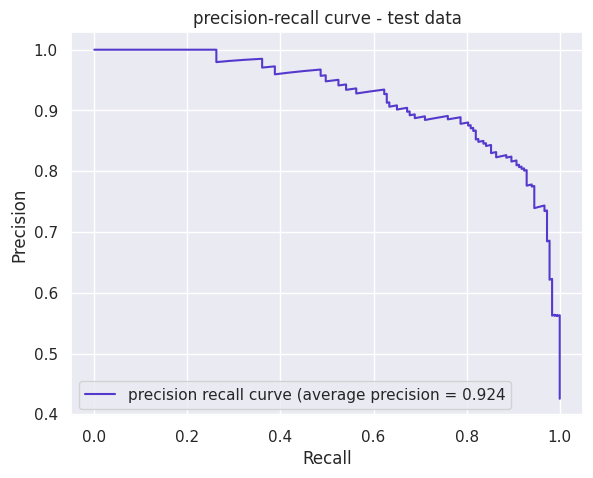

In [12]:
# precision recall
fig, ax = make_precision_recall_plot(test_df.predicted_prob, test_df.Class, title='precision-recall curve - test data')
prec_rec_path = os.path.join(plot_dir,'test_precision_recall_curve.png')
fig.savefig(prec_rec_path)
# mlflow.log_artifact(prec_rec_path, artifact_path='evaluation_plots')
# plt.close()


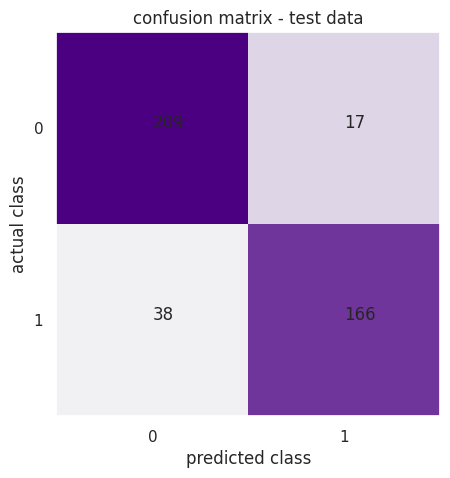

In [13]:
            # confusion matrix
fig, ax = make_confusion_matrix_plot(test_df.predicted_class, test_df.Class, title="confusion matrix - test data")
confusion_plot_path = os.path.join(plot_dir, 'test_confusion_matrix.png')
fig.savefig(confusion_plot_path)
# mlflow.log_artifact(confusion_plot_path, artifact_path='evaluation_plots')
# plt.close()

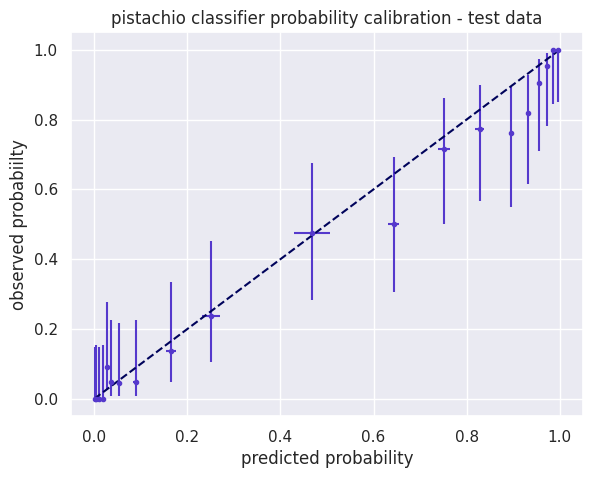

In [14]:
    
# prob calibration
fig, ax = make_prob_calibration_plot(test_df.predicted_prob, test_df.Class, title='pistachio classifier probability calibration - test data')
prob_cal_path = os.path.join(plot_dir,'test_probability_calibration.png')
fig.savefig(prob_cal_path)
# mlflow.log_artifact(prob_cal_path, artifact_path='evaluation_plots')
# plt.close()

In [15]:
# SHAP values
import shap


def shap_wrapper(X):
    feature_dict = {k:X[:,i] for i,k in enumerate(feature_columns)}
    return model.predict(feature_dict, verbose=0).flatten()
    
shap_n_samples = 50
shap_explainer_samples = 50
shap_values_path = './test_shap_values.txt'

shap_violin_path = os.path.join(plot_dir,'test_shap_violin.png')
shap_bar_path = os.path.join(plot_dir,'test_shap_bar.png')
data_shap = test_df.loc[:,feature_columns]
explainer = shap.KernelExplainer(shap_wrapper, data_shap.iloc[:shap_explainer_samples,:])
shap_values = explainer.shap_values(data_shap.iloc[shap_explainer_samples:shap_explainer_samples+shap_n_samples, :], nsamples=200)

with open(shap_values_path,'w') as outfile:
    outfile.write('SHAP values - test data:\n')
    for k,v in zip(feature_columns, shap_values):
        outfile.write(f'{k}: {v}\n')




  0%|          | 0/50 [00:00<?, ?it/s]

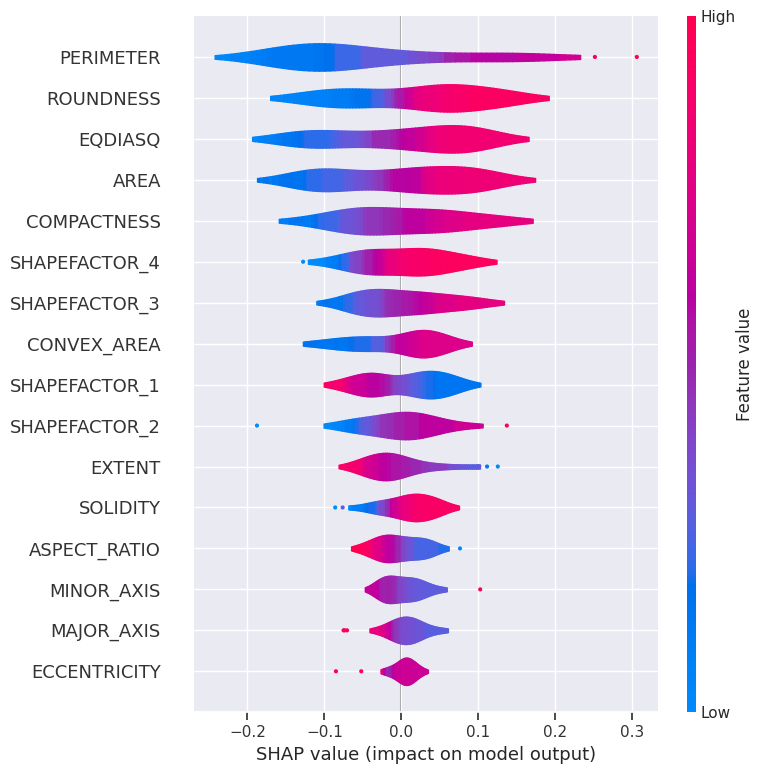

In [16]:
shap.summary_plot(
    shap_values, features=data_shap.iloc[50:100, :], feature_names=feature_columns, plot_type="violin", max_display=30, show=False)
plt.savefig(shap_violin_path)
# plt.close()




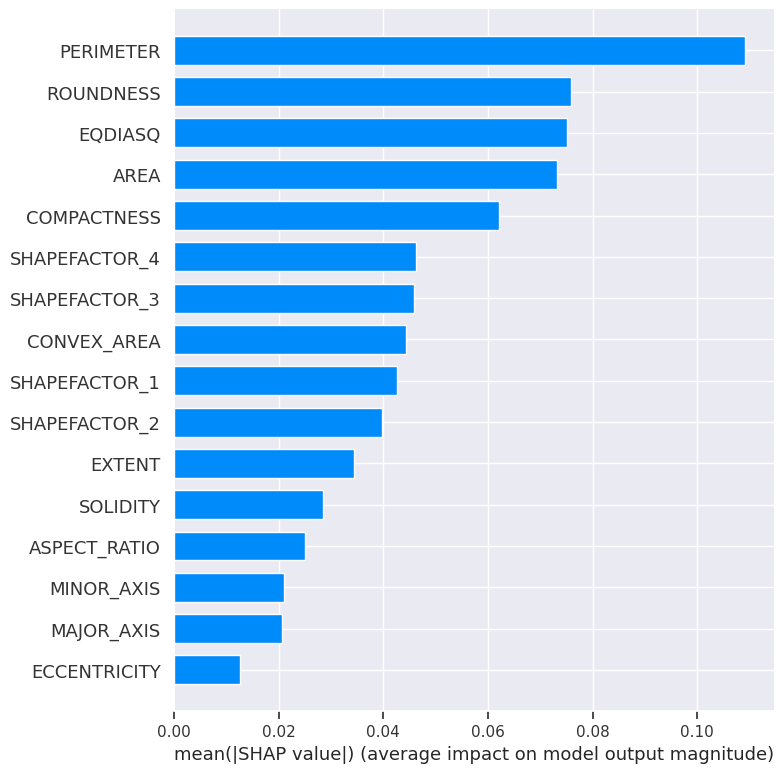

In [17]:
shap.summary_plot(
    shap_values, features=data_shap.iloc[50:100, :], feature_names=feature_columns, plot_type="bar", max_display=30, show=False)
plt.savefig(shap_bar_path)
# plt.close()

In [18]:
with mlflow.start_run(run_id=run_id) as run:
    mlflow.log_artifact(shap_values_path)
    mlflow.log_artifact(shap_bar_path, artifact_path='test_evaluation_plots')
    mlflow.log_artifact(shap_violin_path, artifact_path='test_evaluation_plots')
    mlflow.log_artifact(prob_cal_path, artifact_path='test_evaluation_plots')
    mlflow.log_artifact(confusion_plot_path, artifact_path='test_evaluation_plots')
    mlflow.log_artifact(prec_rec_path, artifact_path='test_evaluation_plots')
    mlflow.log_artifact(roc_plot_path, artifact_path='test_evaluation_plots')
    mlflow.log_artifact('./test_metrics.txt')



🏃 View run unequaled-stoat-25 at: http://pistachio_mlflow:5000/#/experiments/2/runs/6ec34fd4f0dc4a2fb489ff2db6e31cdd
🧪 View experiment at: http://pistachio_mlflow:5000/#/experiments/2


In [1]:
import numpy as np 
# np.log(5e-3)
np.exp(-13)

2.2603294069810542e-06